# Keras Syntax Basics

With TensorFlow 2.x, Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.x.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

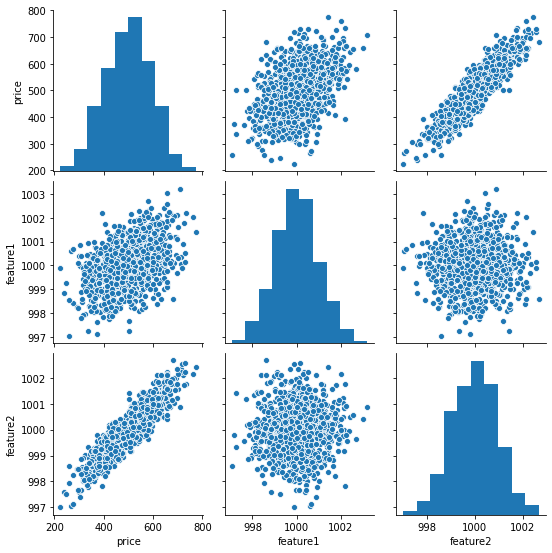

In [5]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split
Keras requires NumPy arrays instead of Pandas DataFrames or Series, so we will add `.values` to our DataFrame cross-sections.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We will need to normalize the test and training **feature data** on the **scale**(or standard deviation) **of the training data ONLY**.  
We will use scikit-learn's [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler) for this task.

The label data `'price'` does not need to be scaled.  
[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to False to perfor

In [14]:
scaler = MinMaxScaler()

**Remember** to prevent data leakage from the test set, we only fit our scaler to the training set

In [15]:
scaler.fit(X_train)

MinMaxScaler()

`.fit()` will compute the minimum and maximum **from the training set** to be used for later scaling.

`.transform()` will scale features of X according to, in this case, the min/max from the earlier fit. This will apply the standard deviation scaling from the training data to the test data. It is important to keep the test data out of the standard deviation scaling fit before transforming your features.

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Let's print out what we've just done

In [17]:
print('X_train min:', X_train.min())
print('X_train max:', X_train.max())

X_train min: 0.0
X_train max: 1.0


So we can see that we've scaled the training data to have a minimum value of 0 and maximum value of 1.

Just out of curiosity, let's see how much spread there is on the test sample data, as the minimum and maximum of that data was scaled using the standard deviation of the training data.

A smaller spread would contain a minimum larger than 0 and/or a maximum less than 1.  
A larger spread would contain a minimum less than 0 and/or a maximum larger than 1.

In [18]:
print('X_test min:', X_test.min())
print('X_test max:', X_test.max())

X_test min: -0.014108392024496652
X_test max: 1.0186515935232023


Please note that this isn't really something you would see in the real world. Peaking at the spread of the test data was just to see what our model will be trying to predict. I also thought it helped me understand what the `MinMaxScaler()` was doing here.

---

# TensorFlow 2.x Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [19]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

## Creating our Neural Network

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [23]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one
This is equivalent to the cell above.

In [24]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [25]:
model = Sequential()

# Hidden Layers
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* **Sample**: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* **Batch**: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model. A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* **Epoch**: an arbitrary cutoff, generally defined as "*one pass over the entire dataset*", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [26]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 951us/step - loss: 256666.7656
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256586.8594
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256507.3125
Epoch 4/250
22/22 [==============================] - 0s 947us/step - loss: 256419.7969
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256323.7188
Epoch 6/250
22/22 [==============================] - 0s 874us/step - loss: 256218.5781
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256103.8125
Epoch 8/250
22/22 [==============================] - 0s 892us/step - loss: 255977.4688
Epoch 9/250
22/22 [==============================] - 0s 993us/step - loss: 255835.1094
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255676.2969
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255499.9844
Epoch 12/250
22/22 [==============================] -

22/22 [==============================] - 0s 1ms/step - loss: 40422.3438
Epoch 96/250
22/22 [==============================] - 0s 1ms/step - loss: 36253.8867
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 32239.7949
Epoch 98/250
22/22 [==============================] - 0s 966us/step - loss: 28365.5938
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 24696.2344
Epoch 100/250
22/22 [==============================] - 0s 909us/step - loss: 21221.5293
Epoch 101/250
22/22 [==============================] - 0s 841us/step - loss: 17954.6016
Epoch 102/250
22/22 [==============================] - 0s 978us/step - loss: 14929.3584
Epoch 103/250
22/22 [==============================] - 0s 849us/step - loss: 12163.4170
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 9702.5039
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 7512.7915
Epoch 106/250
22/22 [==============================] - 0s 945us/

22/22 [==============================] - 0s 872us/step - loss: 240.6643
Epoch 192/250
22/22 [==============================] - 0s 957us/step - loss: 230.9470
Epoch 193/250
22/22 [==============================] - ETA: 0s - loss: 270.015 - 0s 1ms/step - loss: 221.5341
Epoch 194/250
22/22 [==============================] - ETA: 0s - loss: 249.667 - 0s 1ms/step - loss: 213.2316
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 204.9369
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 195.5792
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 188.5209
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 182.1062
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 174.4239
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 166.3595
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 160.6422
Epoch 202/250
22/22 [=============

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [27]:
model.history.history

{'loss': [256666.765625,
  256586.859375,
  256507.3125,
  256419.796875,
  256323.71875,
  256218.578125,
  256103.8125,
  255977.46875,
  255835.109375,
  255676.296875,
  255499.984375,
  255304.65625,
  255089.9375,
  254852.828125,
  254593.671875,
  254309.1875,
  253999.515625,
  253663.359375,
  253295.5625,
  252900.703125,
  252473.09375,
  252010.953125,
  251510.171875,
  250977.0,
  250403.546875,
  249786.3125,
  249126.515625,
  248425.046875,
  247673.21875,
  246875.84375,
  246022.765625,
  245119.75,
  244164.78125,
  243150.71875,
  242076.046875,
  240940.546875,
  239752.34375,
  238494.328125,
  237169.46875,
  235775.765625,
  234315.078125,
  232772.09375,
  231164.9375,
  229478.65625,
  227715.59375,
  225872.953125,
  223946.359375,
  221937.28125,
  219845.71875,
  217675.703125,
  215403.3125,
  213037.390625,
  210604.921875,
  208086.921875,
  205468.578125,
  202744.0625,
  199933.46875,
  197025.03125,
  194020.109375,
  190927.421875,
  187735.78125,


In [28]:
loss = model.history.history['loss']

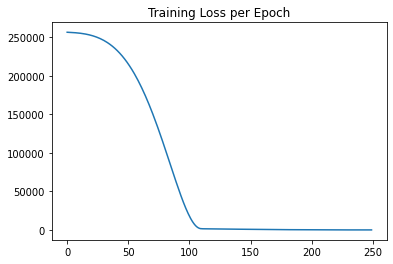

In [29]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

---

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [30]:
model.metrics_names

['loss']

This is to say that the result of `.evaluate()` will be, in this case, our loss value.  
Our loss function in our neural network was set to **mean squared error** in the [previous section](#Creating-our-Neural-Network).

In [31]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [32]:
training_score

24.70551872253418

In [33]:
test_score

26.649179458618164

### Further Evaluations

In [34]:
test_predictions = model.predict(X_test)

In [35]:
test_predictions

array([[406.80017],
       [623.8863 ],
       [592.4686 ],
       [573.2513 ],
       [369.1075 ],
       [579.87805],
       [516.7306 ],
       [460.02737],
       [550.3789 ],
       [448.43997],
       [612.17615],
       [548.9232 ],
       [420.59555],
       [410.54208],
       [650.6343 ],
       [438.42126],
       [508.77228],
       [660.7462 ],
       [663.00616],
       [565.88544],
       [336.51486],
       [446.18152],
       [384.4517 ],
       [380.37253],
       [567.3001 ],
       [611.41376],
       [533.3387 ],
       [429.17764],
       [656.07947],
       [415.24203],
       [443.64957],
       [486.21005],
       [439.69055],
       [682.23584],
       [425.6595 ],
       [419.4582 ],
       [502.0959 ],
       [551.1484 ],
       [511.284  ],
       [397.65622],
       [618.7945 ],
       [417.8528 ],
       [604.7567 ],
       [446.7058 ],
       [502.99887],
       [581.4437 ],
       [668.48395],
       [491.15842],
       [320.201  ],
       [486.5847 ],


In [36]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [37]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [38]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [39]:
test_predictions

0      406.800171
1      623.886292
2      592.468628
3      573.251282
4      369.107513
          ...    
295    530.241028
296    517.519165
297    609.984619
298    418.039337
299    412.652985
Length: 300, dtype: float32

In [40]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [41]:
pred_df.columns = ['Test Y','Model Predictions']

In [42]:
pred_df

,Test Y,Model Predictions
0,402.296319,406.800171
1,624.156198,623.886292
2,582.455066,592.468628
3,578.588606,573.251282
4,371.224104,369.107513
...,...,...
295,525.704657,530.241028
296,502.909473,517.519165
297,612.727910,609.984619
298,417.569725,418.039337


Let's compare to the real test labels!

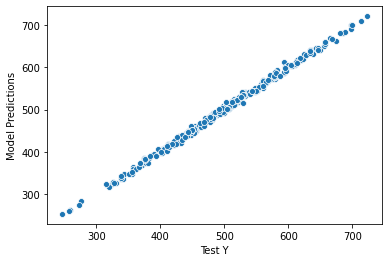

In [43]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)
plt.show()

In [44]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

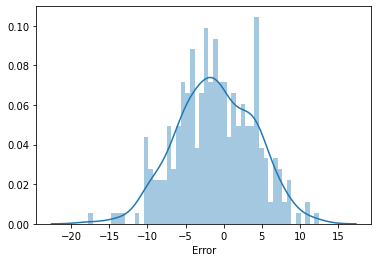

In [45]:
sns.distplot(pred_df['Error'],bins=50)
plt.show()

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.189025169753514

**Question:** Is the average error of about $\pm4$ dollars good, or bad?

*Let's compare this to the average price. Ideally, the average error is several orders of magnitude less than the average price, or to be a small percentage of the average price.*

In [48]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


We can see that the 4 dollars is about 2 orders of magnitude less than the average.  
Alternatively, we can see that the absolute error is about $1\%$ of the average price.

Another way to see if this error is acceptable across our entire dataset&mdash;*besides comparing to the min/max prices*&mdash; is to compare MSE to the standard deviation of prices. We would expect it to be less than our **std** value, and indeed, it is.

In [49]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

26.64918497696383

How much lower you want these metrics than these data statistics is a matter of taste or whether you can find other models with relatively better performance.

In [50]:
# Essentially the same thing, difference just due to precision
test_score

26.649179458618164

In [51]:
#RMSE
test_score**0.5

5.162284325627383

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [52]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [53]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [54]:
new_gem = scaler.transform(new_gem)

In [55]:
model.predict(new_gem)

array([[421.83994]], dtype=float32)

## Saving and Loading a Model

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [58]:
later_model = load_model('my_model.h5')

In [59]:
later_model.predict(new_gem)

array([[421.83994]], dtype=float32)